# Solving Ordinary Differential Equations or ODEs

## A Gentle Introduction for Machine Learning

Resources:
- https://mathinsight.org/ordinary_differential_equation_introduction
- https://www.math.uni-bielefeld.de/~grigor/odelec2008.pdf

# What is an ODE
- Describes the evolution of a system
  * subject to internal and external dynamics
  
- Mathematically
  * Equation involving *ordinary derivatives*
  * Task is to solve for the function
  $$
  \frac{dx(t)}{dt} = \cos{t}
  $$
  * Here $x(t)$ is a function of the parameter $t$
  * Need to solve the above equation to get $x(t)$ for any value of $t$

## Sometimes it can be easy

$$
  \frac{dx(t)}{dt} = \cos{t}
$$
\begin{eqnarray}
x(t) & = & \int \cos{t}dt\\
     & = & \sin{t} + C
\end{eqnarray}

- Of course, we do not know what $C$ is
- "Initial conditions can be used"
  * For example, $x(t_0) = x_0$


# How to deal with more complex ODEs

$$
\frac{dx(t)}{dt} = m \sin{t} + n t^3
$$
Actually this is not much different from before

\begin{eqnarray}
x(t) - x(a) & = & \int_a^t (m \sin{t} + n t^3) dt\\
            & = & -m\cos{t} + \frac{1}{4}nt^4 + m\cos{a} - \frac{1}{4}na^4 + x(a)
\end{eqnarray}

- $x(a)$ comes from the initial condition specification

# Why has it been so simple so far?

- $\frac{dx(t)}{dt}$ did not depend on $x(t)$
- What if the ODE is:
$$
\frac{dx(t)}{dt} = ax(t) + b
$$
- Can use the **$u$-substitution** method
\begin{eqnarray}
\frac{\frac{dx(t)}{dt}}{ax(t) + b}& = &1\\
\frac{\frac{dx(t)}{dt}}{ax(t) + b}& = &\int 1dt\\
\end{eqnarray}
let, $u = x(t), \Rightarrow du = \frac{dx}{dt}dt$. 


## continued ...

- Then, the left hand side becomes:

\begin{eqnarray}
\frac{\frac{dx(t)}{dt}}{ax(t) + b}& = &\int\frac{du}{au + b}\\
                                  & = &\frac{1}{a}\log\vert au + b\vert + C_1\\
                                  & = & \frac{1}{a}\log\vert ax(t) + b\vert + C_1
\end{eqnarray}

- Right hand side evaluates to $\int 1dt = t + C_2$

## continued ...

- Equating both sides:
$$
\frac{1}{a}\log\vert ax(t) + b\vert + C_1 = t + C_2
$$
- and solving for $x(t)$ gives:
$$
x(t) = \pm \frac{1}{a}\exp{(at + xC_3)} - ba
$$
where $C_3 = C_2 - C_1$.
- If we set $C = \pm\frac{1}{a}\exp{(aC_3)}$ then:
$$
x(t) = C\exp{(at)} - ba
$$
- Again, initial conditions can be used to get $C$

# Other types of ODE
- Separable case
$$
\frac{dy(x)}{dx} = f(x)g(y(x))
$$
> **Theorem**: $y(x)$ solves this ODE if and only if it satisfies:
  $$
  G(y(x)) = F(x) + C
  $$
  where $G()$ is the *primitive* of $g()$ and $F()$ is the *primitive* of $f()$
- Linear ODE of first-order
$$
\frac{dy(x)}{dx} + a(x) y(x) = b(x)
$$
> **Theorem**: General solution to the equation has the form:
  $$
  y(x) = e^{-A(x)}\int b(x) e^{A(x)}dx
  $$
  where $A(x)$ is the *primitive* of $a(x)$

# A second-order ODE (Newton's second law of motion)
<img width="400" src = 'https://physicslight.files.wordpress.com/2014/04/projectile_animation.gif'/>
$$
\frac{d^2u(t)}{dt^2} = -\frac{k}{m}\frac{du(t)}{dt} + g
$$
or
$$
u^{\prime\prime} = -\frac{k}{m}u^\prime + g
$$
Here $u(t) = (x(t),y(t))$ and $g$ is a vector (e.g., a gravity acceleration vector).

- Solve above to find position of the object at any given time $t$, i.e., $u(t)$

# Convert to first-order ODE
- Let 
$$
v = \left[\begin{array}{c}u\\u^\prime\end{array}\right]
$$
- Which means that:

\begin{eqnarray}
v^\prime & = & \left[\begin{array}{c}u^\prime\\u^{\prime\prime}\end{array}\right]\\
         & = & \left[\begin{array}{c}u^\prime\\-\frac{k}{m}u^\prime + g\end{array}\right]
\end{eqnarray}

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=2)

# Initialize the values

In [6]:
# The initial position is (0, 0).
v0 = np.zeros(4)
# The initial speed vector is oriented
# to the top right.
v0[2] = 4.
v0[3] = 10.

In [15]:
def f(v, t0, k,m = 1,g = 9.8):
    # v has four components: v=[u, u'].
    u, uprime = v[:2], v[2:]
    # We compute the second derivative u'' of u.
    uprime2 = -k / m * uprime
    uprime2[1] -= g
    # We return v'=[u', u''].
    return np.r_[uprime, uprime2]

# Simulate the system for different values of $k$

In [31]:
vs = []
# We want to evaluate the system on 30 linearly
import scipy.integrate as spi

# spaced times between t=0 and t=3.
t = np.linspace(0., 3., 100)
# We simulate the system for different values of k.
for k in np.linspace(0., 1., 5):
    # We simulate the system and evaluate $v$ on the given times.
    v = spi.odeint(f, v0, t, args=(k,))
    vs.append(v)


(0, 6)

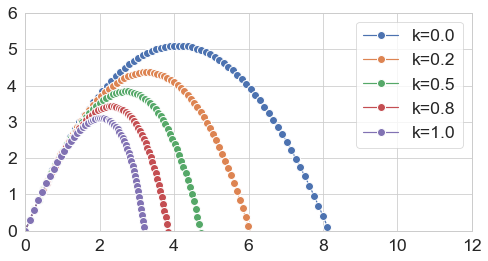

In [32]:
# We plot the particle's trajectory.
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
# We simulate the system for different values of k.
k = np.linspace(0., 1., 5)
for i in range(len(k)):
    # We plot the particle's trajectory.
    ax.plot(vs[i][:, 0], vs[i][:, 1], 'o-', mew=1, ms=8,
            mec='w', label=f'k={k[i]:.1f}')
ax.legend()
ax.set_xlim(0, 12)
ax.set_ylim(0, 6)

# The SciPy odeint() function 
- black-box solver
  * specify the function that describes the system, 
  * and SciPy solves it automatically. 
  * leverages the FORTRAN library ODEPACK
- newer `solve_ivb()` function also exists


# A simple numerical solver - Euler's method
- Consider the ODE:
$$
y^\prime = f(y)
$$
- One can discretize time in steps $dt$
- Approximate $y^\prime$ as:
$$
y^\prime \simeq \frac{y(t + dt) - y(t)}{dt}
$$
- Starting from $y_0 = y(t_0)$, following recursion is solved
$$
y_{n+1} = y_n + dt\cdot f(y_n)
$$
with:
$$
t = n\cdot dt,\quad y_n = y(n\cdot dt)
$$

In [53]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF

# Using Gaussian Process Regression

In [119]:
# create data
nsamples = 25
rnd = np.random.permutation(len(t))
XTrain = t[rnd[0:nsamples]]
XTrain = XTrain[:,np.newaxis]
YTrain = vs[0][rnd[0:nsamples],0:2]

In [120]:
# setup and fit model
gp_kernel = RBF(1.0) + WhiteKernel(1e-1)
gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr = gpr.fit(XTrain,YTrain)

In [121]:
# get predictions
XTest = t[:,np.newaxis]
YTest = vs[0][:,0:2]
YPred = gpr.predict(XTest)

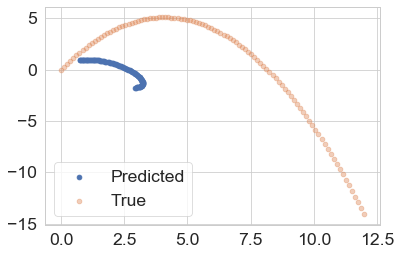

In [122]:
plt.scatter(YPred[:,0],YPred[:,1])
plt.scatter(YTest[:,0],YTest[:,1],alpha=0.4)
plt.legend(['Predicted','True'])

# Project Ideas?

- Reduced order model in the reduced space (autoregression of time series)

- "How much data is needed? Manifold can tell": streaming isomap, when we have enough data (Procrustes error)

- "Active learning of dynamic data" design the new round of manifold based on the gaps/empty zones in the manifold 